## PPG Extraction Pipeline

**_Our videos are obtained from Smartphone camera videos. We recorded our sample videos from several devices. This is a sample script to demonstrate the pipeline explicitly. The recording used in this script is recorded by an iPhone13 device. Sample rate 30Hz and recorded in resolution of 1080p._**

**This part will be an implementation notes section**

_Since we recorded the video with an iphone device, we did got the video in the MOV format, so in order to process it we have used OpenCV library, which is imported in Importing part as cv2_

_If we check the first figure, we see that in the first seconds the recording fluctuates, which is understandable, because the patient (me) was trying to fit my finger to the camera screen. :D_

_And also we can see that the signals require a low-pass filter, because of the high-frequency noise that we have on the signal._

_After filtering we can notice that the first seconds, also the camera tries to adapt to the colour changes. So, for proper recording we can get rid of the first few seconds. It will also affect the filtering performance. But to be able to compare it the changes will be applied to the another session of recording._

## Packages Required to Use

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Custom Methods for Demonstration

In [2]:
def rgb_plotter(red,green,blue,frames_num):
    x_axis = np.linspace(0,frames_num/30, frames_num)
    fig, axs = plt.subplots(3)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    fig.suptitle('RGB plots of the Collected Data without preprocessing')
    axs[0].plot(x_axis,red, "r")
    axs[1].plot(x_axis,green, "g")
    axs[2].plot(x_axis,blue, "b")
    

## Importing the sample video

In [3]:
vid = cv2.VideoCapture('test.mov')

In [4]:
type(vid)

cv2.VideoCapture

In [5]:
frames = []
counter = 0

In [6]:
while(vid.isOpened()):
    counter += 1
    ret, frame = vid.read()
    np_frame = np.asarray(frame) 
    if counter % 100 == 0:
        print("The collected amount of frames --> " + str(counter))
    frames.append(np_frame)
    if np_frame.shape != (1920,1080,3):
        print("----------------------------------------------------------")
        print("Whole Frames are collected, total frames collected --> " + str(counter) + " Which corresponds to a video of --> "
            + str(counter/30) + " seconds")
        break  
        
frames.pop()
vid.release()
cv2.destroyAllWindows()


The collected amount of frames --> 100
The collected amount of frames --> 200
----------------------------------------------------------
Whole Frames are collected, total frames collected --> 258 Which corresponds to a video of --> 8.6 seconds


In [7]:
frames = -np.array(frames)
signal_shape = np.shape(frames)
frames_num = signal_shape[0]

In [8]:
frames_num 

257

In [9]:
reds = []
greens = []
blues = []

for i in range(frames_num):
    temp_frame = frames[i]
    temp_red = np.mean(temp_frame[:,:,0])
    temp_green = np.mean(temp_frame[:,:,1])
    temp_blue = np.mean(temp_frame[:,:,2])
    reds.append(temp_red)
    greens.append(temp_green)
    blues.append(temp_green)
    

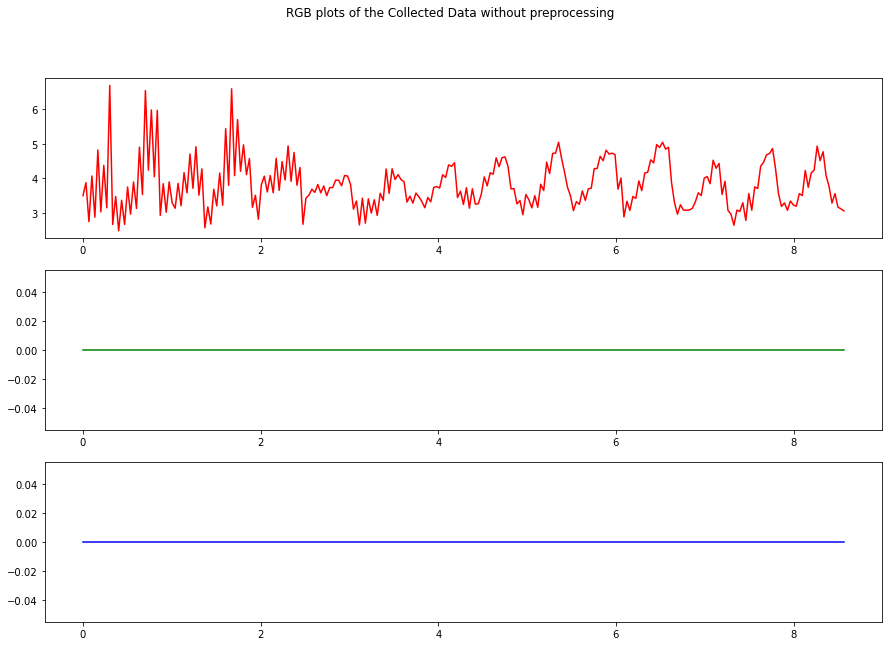

In [10]:
rgb_plotter(reds,greens,blues,frames_num)

## Low-pass Filtering of the Signal

In [11]:
reds = np.array(reds)
greens = np.array(greens)
blues = np.array(blues)

In [12]:
sos = signal.butter(10, 7, 'lp', fs=30, output='sos')
f_red = signal.sosfilt(sos, reds)
f_blue = signal.sosfilt(sos, blues)
f_green = signal.sosfilt(sos, greens)

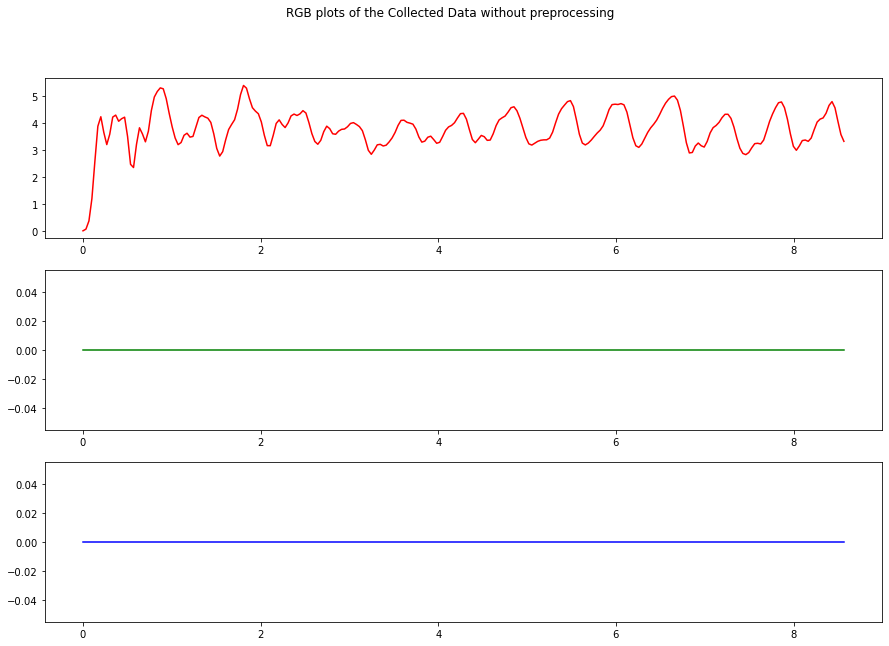

In [13]:
rgb_plotter(f_red,f_blue,f_green,frames_num)

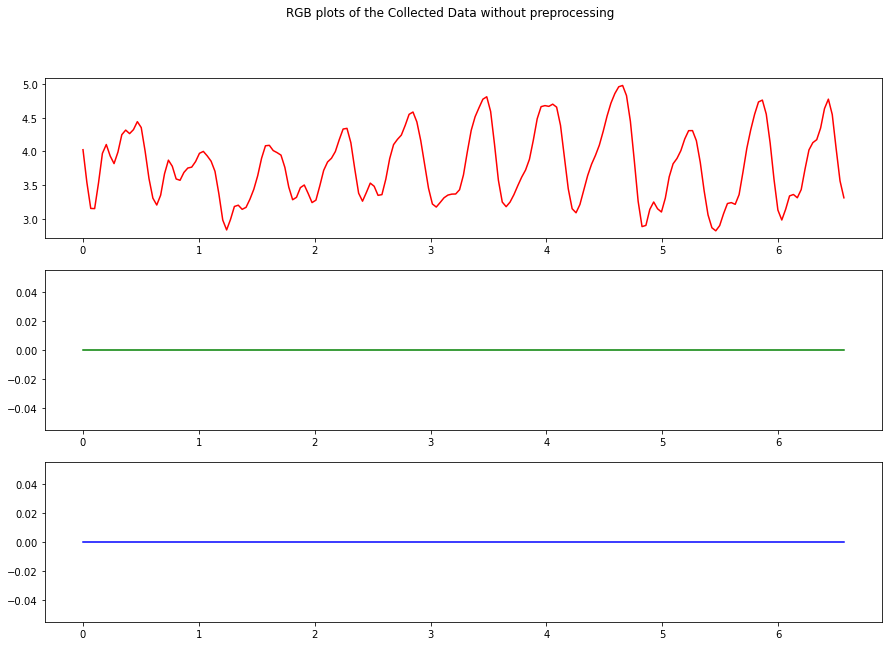

In [24]:
rgb_plotter(f_red[60:],f_blue[60:],f_green[60:],frames_num-60)